In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [2]:
sns.set_theme()

In [3]:
data_fp = "inputs/Mercados_CIP_Consolidado.xlsx"

In [4]:
df_main = pd.read_excel(data_fp)

In [5]:
df_trabajadores = pd.read_excel(data_fp, sheet_name=1)

In [6]:
df_productos = pd.read_excel(data_fp, sheet_name=2)

In [7]:
df_lista = pd.read_excel(data_fp, sheet_name=3)

### Preguntas criticas:

Tabla principal:
- 18. ¿Cuántos horas por día trabaja en su puesto?

Tabla productos
- Cantidad comprada a la semana (kg)
- Cantidad vendida a la semana (kg)

In [8]:
profile = ProfileReport(df_main, title="Reporte tabla principal")

In [9]:
# profile.to_file("outputs/reports/df_main.html")

In [10]:
profile_productos = ProfileReport(df_productos, title="Reporte tabla productos")

In [11]:
# profile_productos.to_file("outputs/reports/df_productos.html")

In [12]:
main_sel_cols = ["3. Nombre del Mercado",
                 "4. Distrito", "_index"]
prod_sel_cols = ["Producto", "Origen", 
                 "¿Con que frecuencia compra a la semana?", 
                 "Cantidad comprada a la semana (kg)", 
                 "Cantidad vendida a la semana (kg)", 
                 "_index", "_parent_index"]

In [13]:
dff = df_main[main_sel_cols].merge(df_productos[prod_sel_cols], 
                             left_on="_index", 
                             right_on="_parent_index", 
                             suffixes=["_main", "_prod"])

In [14]:
# ¿Cuáles son los principales mercados de donde se abastecen
# los comerciantes?

princ_mcdos = (dff.groupby(["Origen"])
 .agg({"Cantidad comprada a la semana (kg)": "sum",
       "Cantidad vendida a la semana (kg)": "sum",
       "_index_main": "count"})
 .sort_values("Cantidad comprada a la semana (kg)", ascending=False)
 .rename({"_index_main": "Numero de productos"}, axis=1))

In [15]:
# princ_mcdos.to_excel("outputs/tables/principales_mcdos_abastecimiento.xlsx")

In [16]:
# ¿Cuáles son los principales productos?

main_prods = (dff.groupby(["Producto"])
 .agg({"Cantidad comprada a la semana (kg)": "sum",
       "Cantidad vendida a la semana (kg)": "sum",
       "_index_main": "count"})
 .sort_values("Cantidad comprada a la semana (kg)", ascending=False)
 .rename({"_index_main": "Numero de compras"}, axis=1))

In [17]:
main_prods

,Cantidad comprada a la semana (kg),Cantidad vendida a la semana (kg),Numero de compras
Producto,,,
Cebolla,5395.000000,3810.000,32
Papa amarilla,2910.000000,2477.000,22
Limón,2657.666667,2444.000,24
Tomate,2615.000000,2229.000,24
Papa yungay,2412.000000,2760.000,12
...,...,...,...
Rabanito,4.268000,4.656,2
Caigua,3.000000,3.000,1
Nabo,2.000000,2.000,1


In [18]:
# main_prods.to_excel("outputs/tables/principales_productos.xlsx")

In [19]:
main_prods_names = main_prods.head(10).index.tolist()

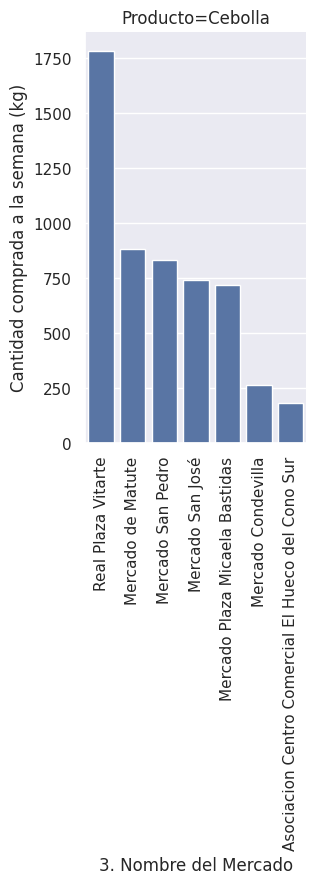

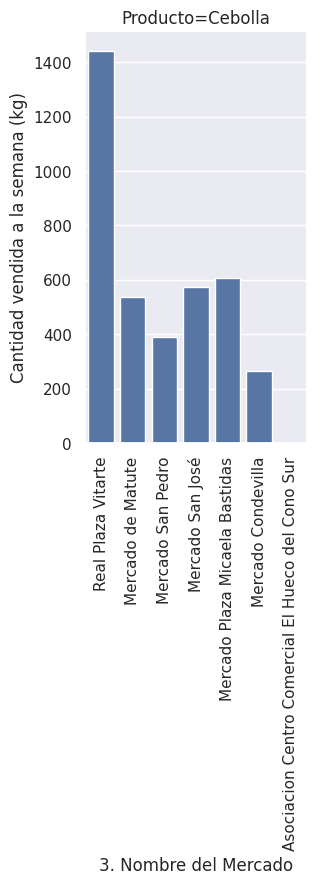

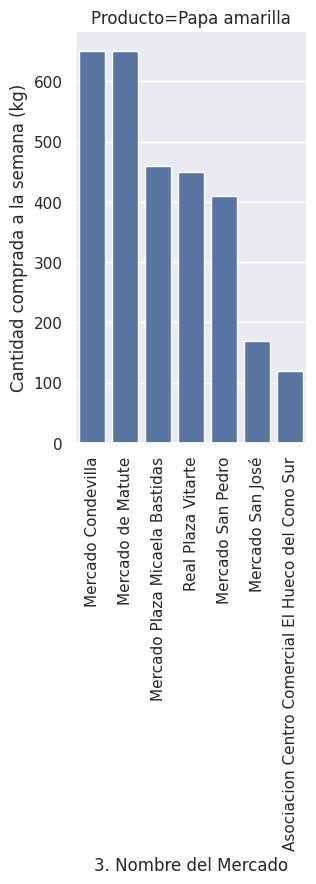

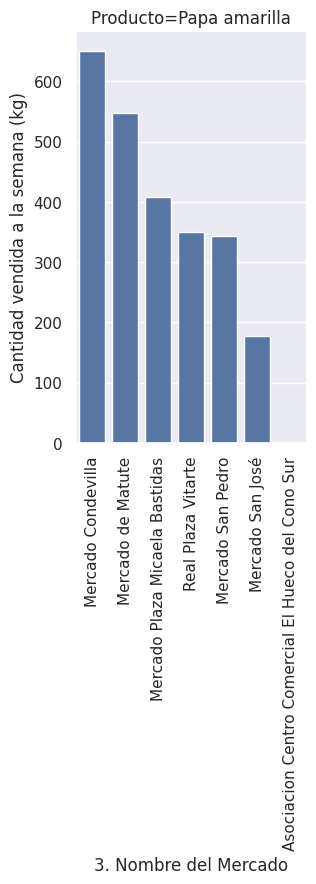

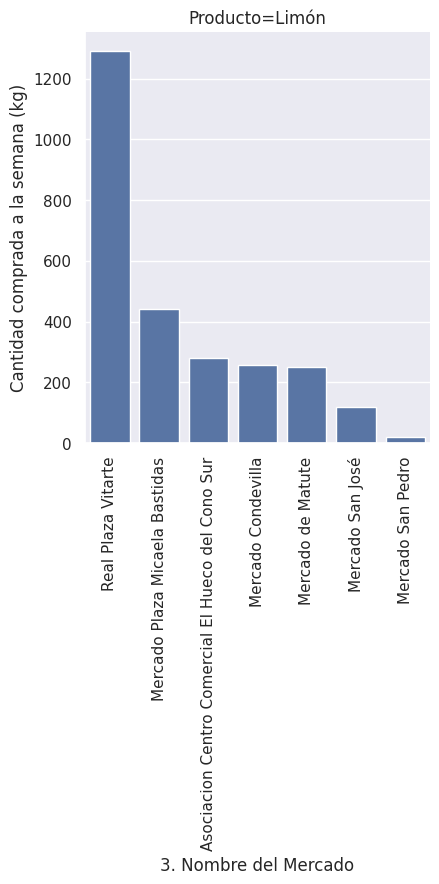

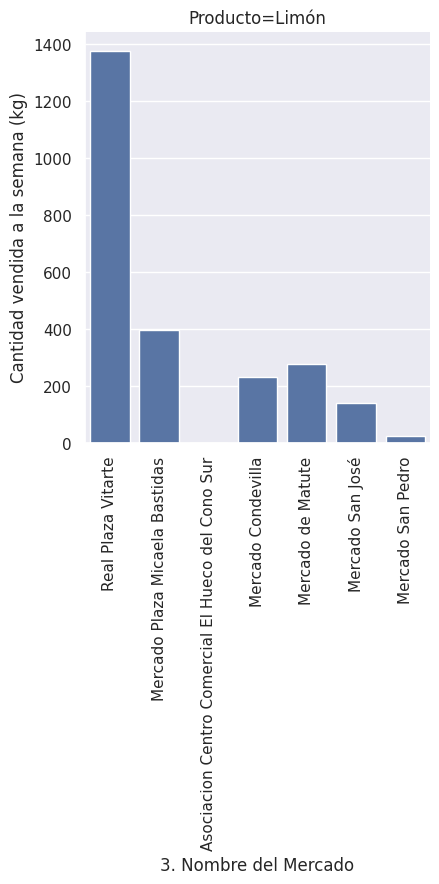

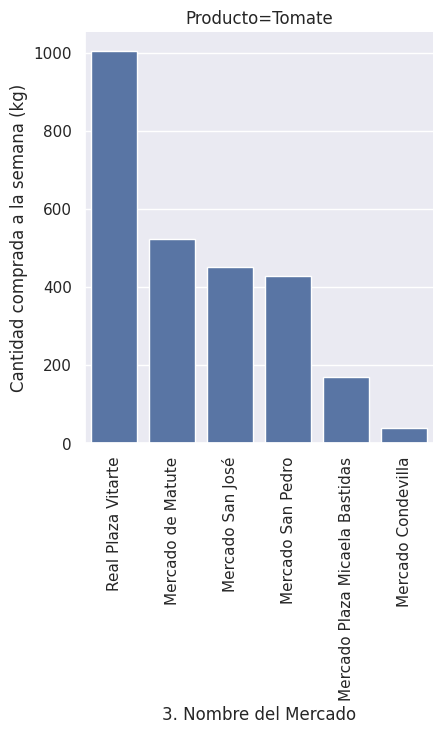

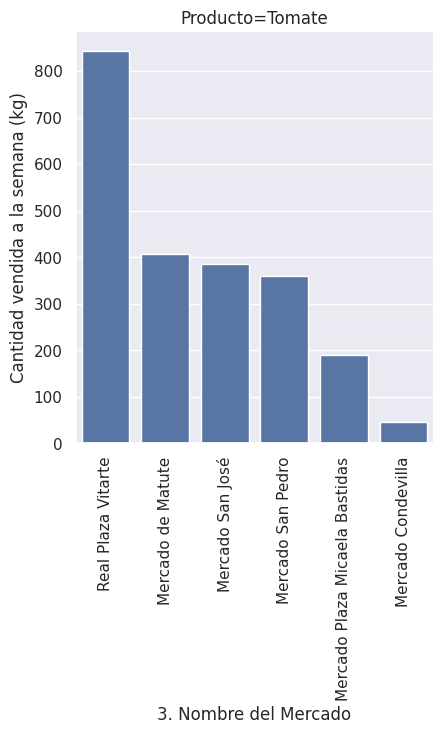

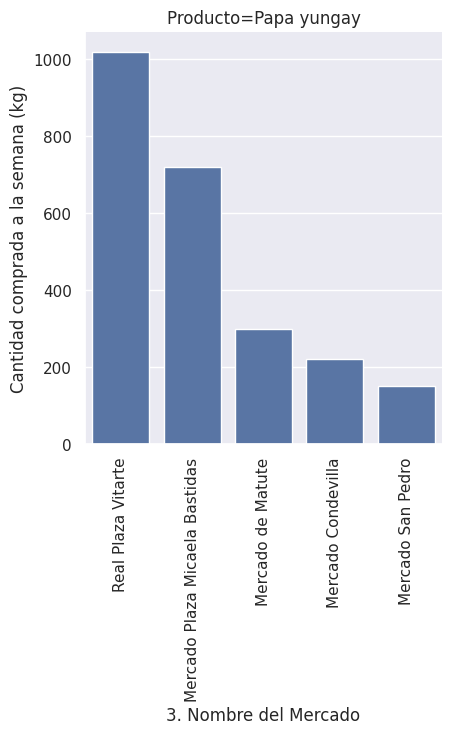

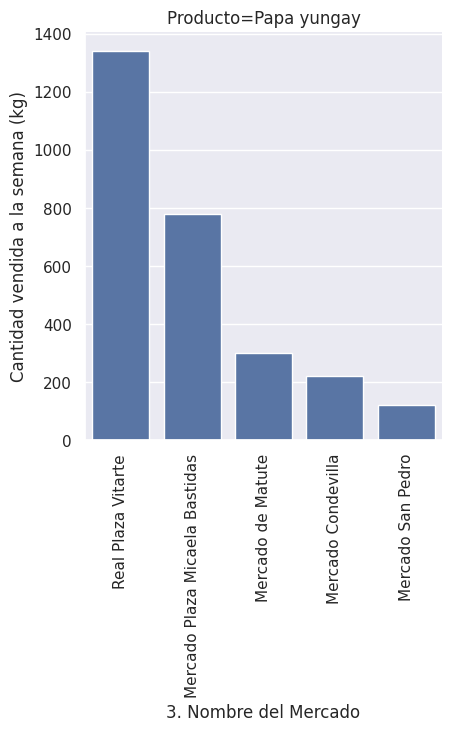

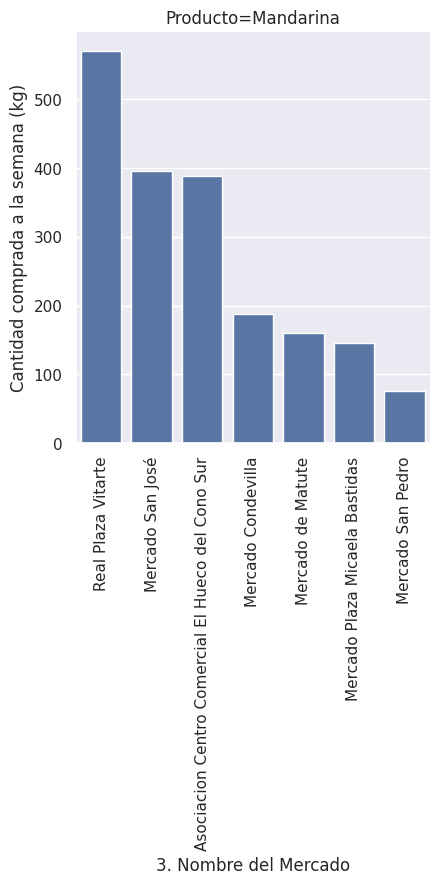

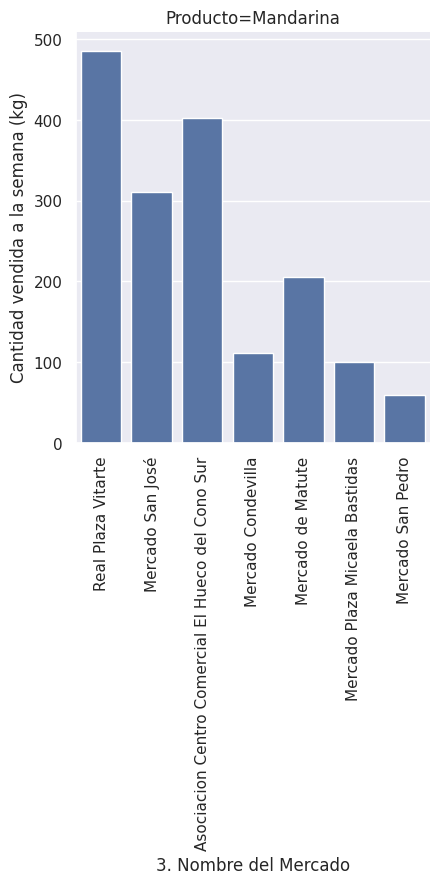

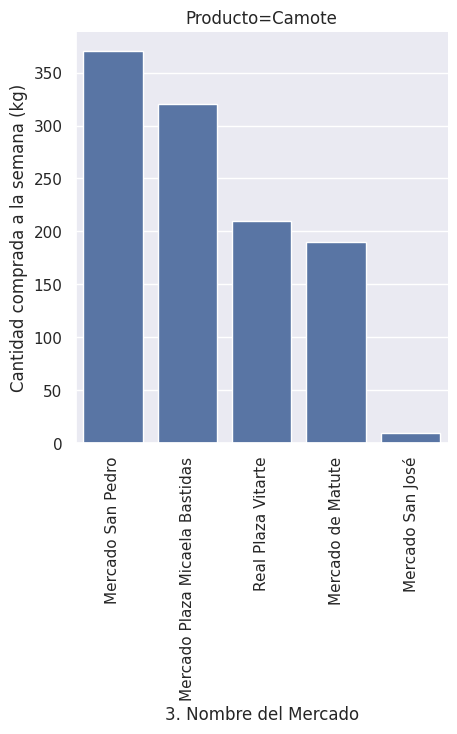

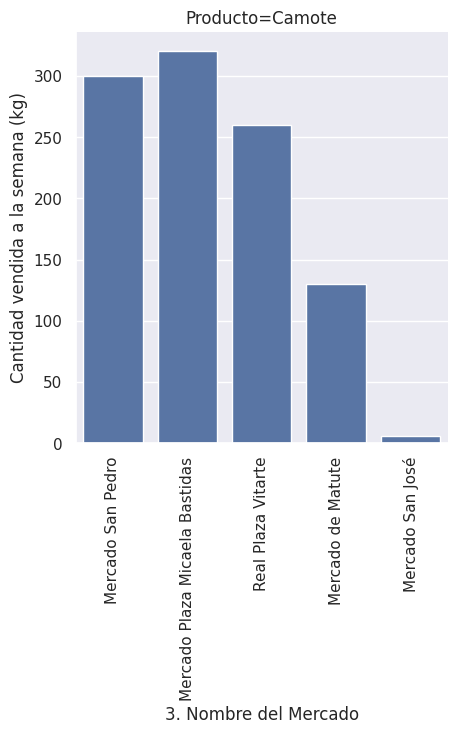

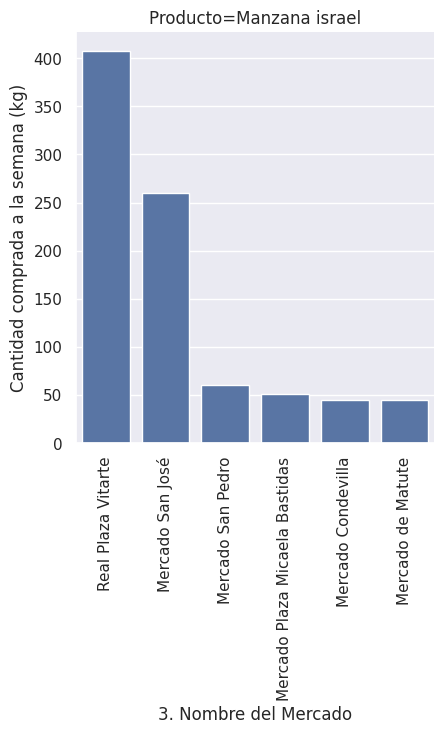

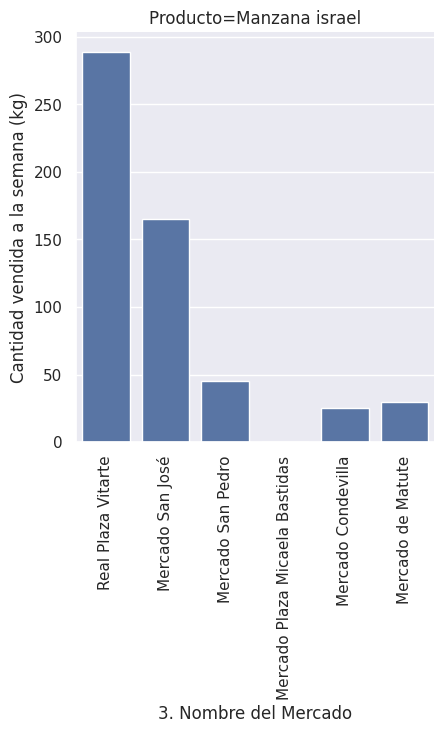

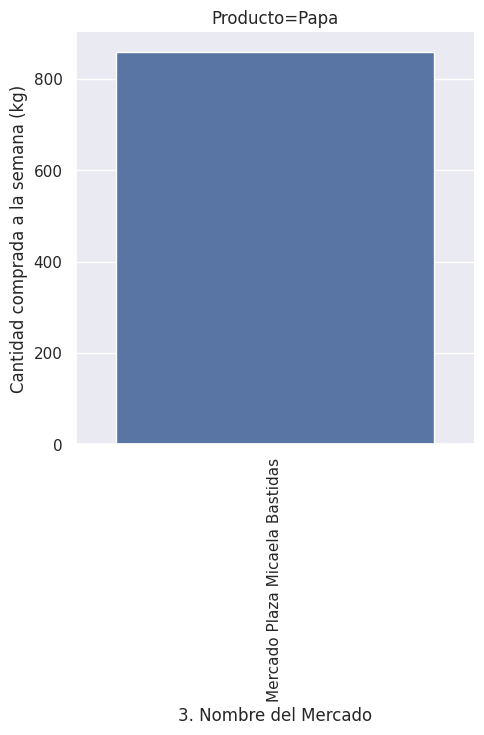

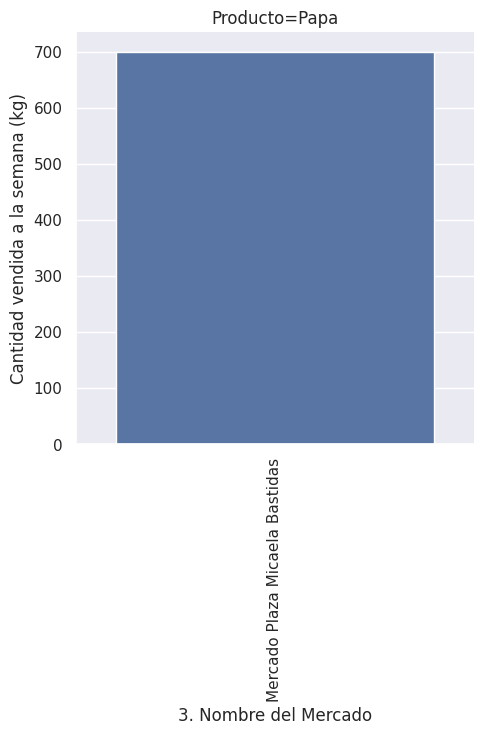

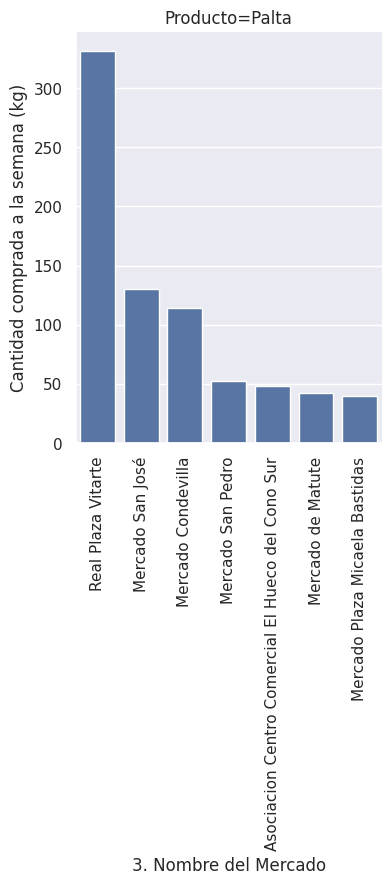

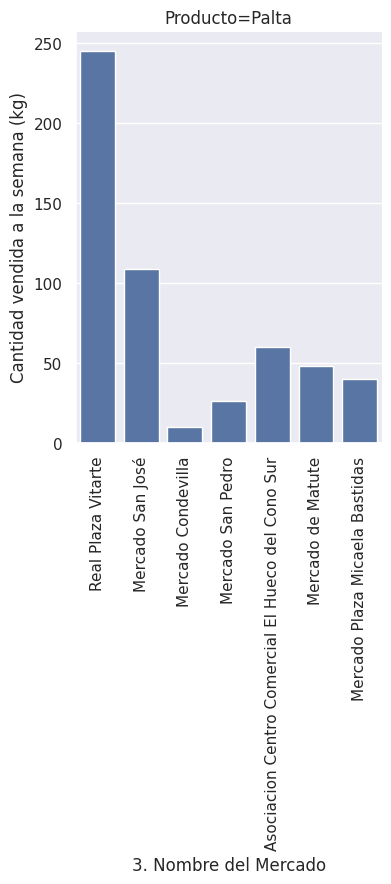

In [20]:
# ¿Cuál es la cantidad/volumen de estos productos que 
# demandan los comerciantes?


for prod in main_prods_names:
    dfff = (dff[dff["Producto"] == prod]
     .groupby(['3. Nombre del Mercado'])
     .agg({"Cantidad comprada a la semana (kg)": "sum",
           "Cantidad vendida a la semana (kg)": "sum",
           "_index_main": "count"})
     .sort_values("Cantidad comprada a la semana (kg)", ascending=False)
     .rename({"_index_main": "Numero de compras"}, axis=1))
    
    g = sns.catplot(data=dfff.reset_index(), kind="bar", 
    color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
            x="3. Nombre del Mercado",
            y="Cantidad comprada a la semana (kg)")
    g.set(title=f"Producto={prod}")
    g.set_xticklabels(rotation=90)
    plt.savefig(f"outputs/figs/q_comprada/{prod}_x_mcdo.png")
    plt.show()
    
    g = sns.catplot(data=dfff.reset_index(), kind="bar", 
    color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
            x="3. Nombre del Mercado",
            y="Cantidad vendida a la semana (kg)")
    g.set(title=f"Producto={prod}")
    g.set_xticklabels(rotation=90)
    #plt.savefig(f"outputs/figs/q_vendida/{prod}_x_mcdo.png")
    #plt.show()
    

In [21]:
df_main['3. Nombre del Mercado']

0                        Mercado Plaza Micaela Bastidas
1                        Mercado Plaza Micaela Bastidas
2                        Mercado Plaza Micaela Bastidas
3                        Mercado Plaza Micaela Bastidas
4     Asociacion Centro Comercial El Hueco del Cono Sur
                            ...                        
72                                   Real Plaza Vitarte
73                                   Real Plaza Vitarte
74                                   Real Plaza Vitarte
75                                   Real Plaza Vitarte
76                                   Real Plaza Vitarte
Name: 3. Nombre del Mercado, Length: 77, dtype: object

In [22]:
df_main['4. Distrito']

0     Villa María del Triunfo
1     Villa María del Triunfo
2     Villa María del Triunfo
3     Villa María del Triunfo
4     Villa María del Triunfo
               ...           
72                Ate Vitarte
73                Ate Vitarte
74                Ate Vitarte
75                Ate Vitarte
76                Ate Vitarte
Name: 4. Distrito, Length: 77, dtype: object

In [23]:
mcdo = (df_main['3. Nombre del Mercado'] + 
        ", " + 
        df_main['4. Distrito']).unique()

In [24]:
mcdo

array(['Mercado Plaza Micaela Bastidas, Villa María del Triunfo',
       'Asociacion Centro Comercial El Hueco del Cono Sur, Villa María del Triunfo',
       'Mercado San José, Jesús María',
       'Mercado San Pedro, Villa El Salvador',
       'Mercado de Matute, La Victoria',
       'Mercado Condevilla, San Martín de Porres',
       'Real Plaza Vitarte, Ate Vitarte'], dtype=object)

In [25]:
import geopy

In [26]:
geopy.geocoders.options.default_user_agent = "food-hub"

In [27]:
mcdo_locations = gpd.tools.geocode(mcdo, provider="nominatim")

In [28]:
mcdo_locations

,geometry,address
0,GEOMETRYCOLLECTION EMPTY,None
1,GEOMETRYCOLLECTION EMPTY,None
2,POINT (-77.04931 -12.07413),"Mercado San José, 364, Avenida República Domin..."
3,POINT (-76.93877 -12.21401),"Mercado San Pedro, Avenida César Vallejo, Sect..."
4,POINT (-77.02614 -12.07296),"Mercado de la Unidad Vecinal Matute, Javier Lu..."
5,POINT (-77.08251 -12.02250),"Mercado Condevilla, 180, Avenida José Granda, ..."
6,POINT (-76.93200 -12.04138),"Real Plaza Puruchuco, 4770, Avenida Nicolás de..."


In [29]:
from shapely.geometry import Point

In [30]:
# https://www.google.com/maps/place/Mercado+Micaela+Vmt/@-12.1733069,-76.9507252,17z/data=!3m1!4b1!4m5!3m4!1s0x9105b911a9a1d0bf:0xde805269788ee79f!8m2!3d-12.1733122!4d-76.9485365
mcdo_locations.loc[0, "geometry"] = Point(-76.9485365, -12.1733122)
mcdo_locations.loc[0, "address"] = "Av Pachacutec 2860, Villa María del Triunfo 15816, Perú"

# https://www.google.com/maps/place/Mercado+El+Hueco+del+Cono+Sur/@-12.1742447,-76.9506237,17z/data=!3m1!4b1!4m5!3m4!1s0x9105b98556ce6111:0x4248283b3f5136c!8m2!3d-12.17425!4d-76.948435
mcdo_locations.loc[1, "geometry"] = Point(-76.948435, -12.17425)
mcdo_locations.loc[1, "address"] = "R3G2+7JW, Villa María del Triunfo 15816, Perú"

In [31]:
mcdo_locations.to_csv("outputs/data/mcdo_locations.csv")

In [32]:
mcdo_locations.explore(marker_kwds={"radius":15})

In [33]:
mcdo_origen = pd.Series(dff['Origen'].unique())

In [34]:
mcdo_origen = (mcdo_origen
               .str.replace(" - ", ", ")
               .str.replace(" -", ", "))

In [35]:
mcdo_origen

0     Gran Mercado Mayorista de Lima, Santa Anita
1             Mercado Unicachi, Villa El Salvador
2        Mercado Mayorista de Frutas, La Victoria
3                  Mercado La Parada, La Victoria
4                                           Junín
5                                          Huaral
6           Mercado Tierra Prometida, Santa Anita
7       Gran Mercado Mayorista Conzac, Los Olivos
8                               Carretera Central
9                                        Huancayo
10                                          Tarma
dtype: object

In [36]:
mcdo_origen_locations = gpd.tools.geocode(mcdo_origen,
                                          provider="nominatim")

In [37]:
mcdo_origen_locations

,geometry,address
0,POINT (-76.94403 -12.03878),"Gran Mercado Mayorista de Lima, 808, Avenida L..."
1,POINT (-76.96467 -12.19929),"Mercado Mayorista Plaza Unicachi Sur, Avenida ..."
2,GEOMETRYCOLLECTION EMPTY,None
3,POINT (-77.01113 -12.06425),"Mercado Minorista de La Parada, Avenida Aviaci..."
4,POINT (-75.00000 -11.50000),"Junín, Perú"
5,POINT (-76.91667 -11.25000),"Huaral, Lima, Perú"
6,GEOMETRYCOLLECTION EMPTY,None
7,GEOMETRYCOLLECTION EMPTY,None
8,POINT (-76.48810 -11.88775),"Carretera Central, Surco, Huarochirí, Lima, Perú"
9,POINT (-75.21010 -12.06810),"Huancayo, Junín, Perú"


In [38]:
# https://www.google.com/maps/place/Mercado+Mayorista+de+Frutas+N%C2%B02+La+Victoria/@-12.0692144,-76.9995991,18z/data=!3m1!4b1!4m5!3m4!1s0x9105c74ed2efd813:0xfa837e6e96683cf3!8m2!3d-12.069217!4d-76.9985048
mcdo_origen_locations.loc[2, "geometry"] = Point(-76.9985048, -12.069217)
mcdo_origen_locations.loc[2, "address"] = "Av Nicolás Arriola cdra.24, La Victoria 15019, Perú"

# https://www.google.com/maps/place/Mercado+Tierra+Prometida/@-12.0335512,-76.9449756,19.32z/data=!4m5!3m4!1s0x9105c55662e38327:0x3ba3863781e3330e!8m2!3d-12.0337293!4d-76.9446071
mcdo_origen_locations.loc[6, "geometry"] = Point(-76.9446071, -12.0337293)
mcdo_origen_locations.loc[6, "address"] = "X384+G52, Av. Metropolitana, Lima 15011, Perú"

# https://www.google.com/maps/place/Gran+Mercado+Mayorista+Conzac/@-12.0054632,-77.0738985,17z/data=!3m1!4b1!4m5!3m4!1s0x9105cef1753d1cc7:0xfa8190a00d5c4a2e!8m2!3d-12.0054753!4d-77.0717024
mcdo_origen_locations.loc[7, "geometry"] = Point(-77.0717024, -12.0054753)
mcdo_origen_locations.loc[7, "address"] = "XWVH+X97, Av. Angélica Gamarra de León Velarde 850 - 860, Los Olivos 15302, Perú"

In [40]:
mcdo_origen_locations.to_csv("outputs/data/mcdo_origen_locations.csv")

In [39]:
mcdo_origen_locations.explore(marker_kwds={"radius":15})

In [41]:
import pydeck as pdk

In [ ]:
mcdo_locations["nombre"] = df_main['3. Nombre del Mercado'].unique().tolist()
mcdo_locations["lng_mcdo_dest"] = mcdo_locations.geometry.x
mcdo_locations["lat_mcdo_dest"] = mcdo_locations.geometry.y

In [76]:
mcdo_origen_locations["nombre"] = dff['Origen'].unique().tolist()
mcdo_origen_locations["lng_mcdo_orig"] = mcdo_origen_locations.geometry.x
mcdo_origen_locations["lat_mcdo_orig"] = mcdo_origen_locations.geometry.y

In [77]:
df_arcs = dff[['3. Nombre del Mercado',  'Origen']]

In [82]:
df_arcs_geo = (df_arcs
    .merge(
        mcdo_locations[['nombre', "lng_mcdo_dest", "lat_mcdo_dest"]],
        how="left",
        left_on="3. Nombre del Mercado", 
        right_on="nombre")
    .rename({"nombre":"Destino"}, axis=1)
    .merge(
        mcdo_origen_locations[['nombre', "lng_mcdo_orig", "lat_mcdo_orig"]],
        how="left",
        left_on="Origen",
        right_on="nombre"
    )
    .drop(["3. Nombre del Mercado", "nombre"], axis=1)
)

In [85]:
df_arcs_geo.head()

,Origen,Destino,lng_mcdo_dest,lat_mcdo_dest,lng_mcdo_orig,lat_mcdo_orig
0,Gran Mercado Mayorista de Lima - Santa Anita,Mercado Plaza Micaela Bastidas,-76.948537,-12.173312,-76.944026,-12.038777
1,Gran Mercado Mayorista de Lima - Santa Anita,Mercado Plaza Micaela Bastidas,-76.948537,-12.173312,-76.944026,-12.038777
2,Mercado Unicachi -Villa El Salvador,Mercado Plaza Micaela Bastidas,-76.948537,-12.173312,-76.964665,-12.199294
3,Mercado Unicachi -Villa El Salvador,Mercado Plaza Micaela Bastidas,-76.948537,-12.173312,-76.964665,-12.199294
4,Mercado Mayorista de Frutas - La Victoria,Mercado Plaza Micaela Bastidas,-76.948537,-12.173312,-76.998505,-12.069217


In [118]:
GREEN_RGB = [0, 255, 0, 40]
RED_RGB = [240, 100, 0, 40]

# Specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df_arcs_geo,
    get_width=5,
    get_source_position=["lng_mcdo_orig", "lat_mcdo_orig"],
    get_target_position=["lng_mcdo_dest", "lat_mcdo_dest"],
    get_tilt=15,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
)

view_state = pdk.ViewState(
    latitude=-11.7,
    longitude=-76.5,
    #bearing=45,
    pitch=50,
    zoom=7,
)

In [119]:
TOOLTIP_TEXT = {"html": "Destino: {Destino} <br /> Origen: {Origen}"}
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT)
r.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{\n  "initialViewState": {…

In [120]:
r.to_html("mercados_arcos_v1.html")